In [ ]:
# Cell 1 - Imports & Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

import pydotplus
from IPython.display import Image
from google.colab import files

# Load Penguins dataset
df = sns.load_dataset("penguins")

# Drop missing values
df = df.dropna()

print(df.head())
print("\nDataset Info:")
df.info()


  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
4       3450.0  Female  
5       3650.0    Male  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4 

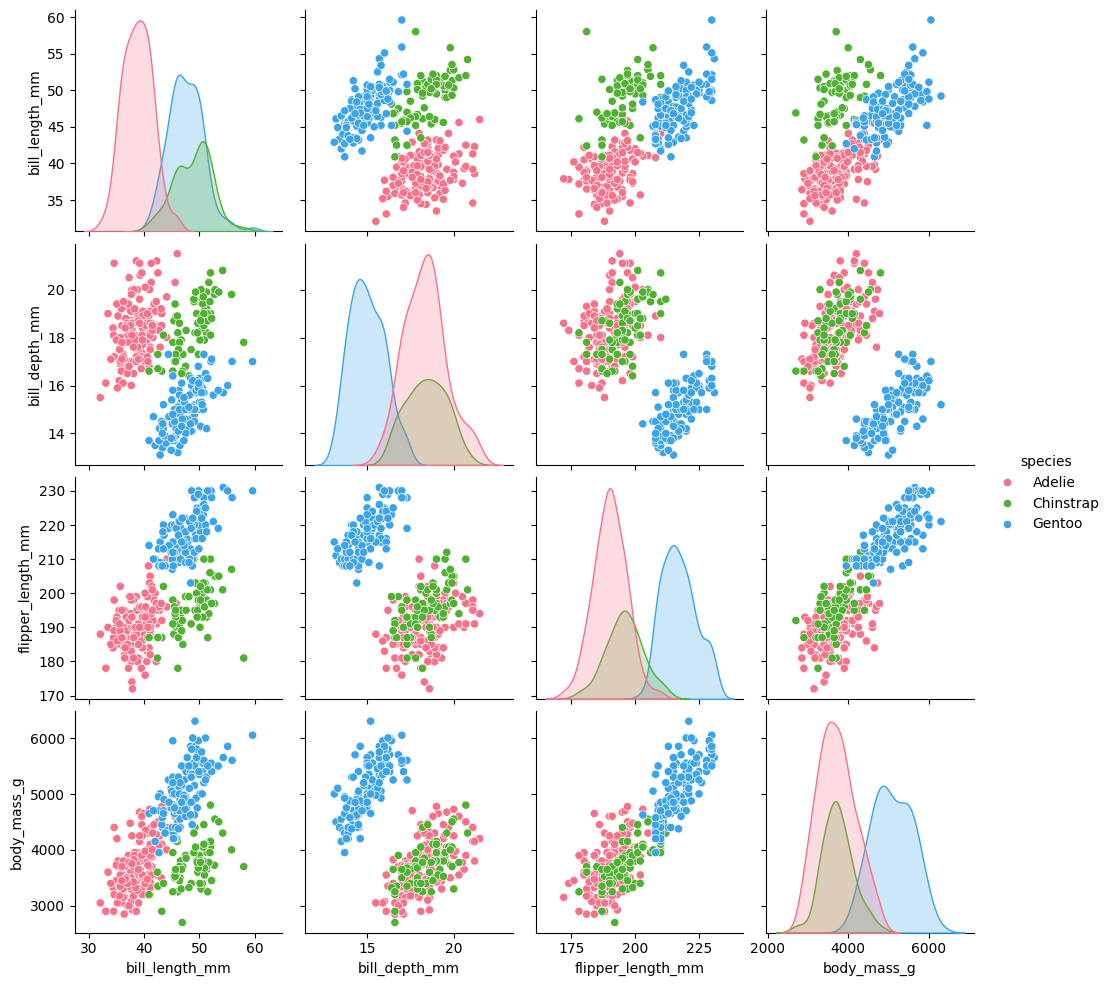

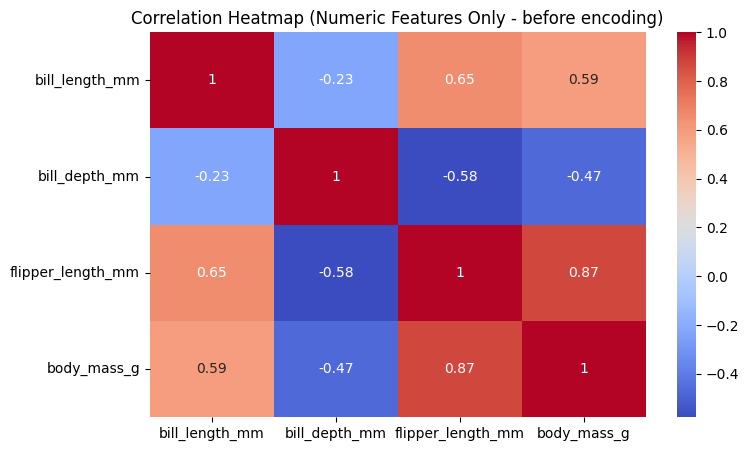

In [ ]:
# Cell 2 - Visualization BEFORE encoding

# Pairplot (drop sex, since it's categorical text)
sns.pairplot(df.drop(["sex"], axis=1), hue="species", palette="husl")
plt.show()

# Correlation heatmap (numeric only)
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(8,5))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features Only - before encoding)")
plt.show()


In [ ]:
# Cell 3 - Preprocessing
df_encoded = df.copy()

# Encode categorical columns (sex, island, species)
label_encoders = {}
for col in ["sex", "island", "species"]:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Features and target
X = df_encoded.drop("species", axis=1)
y = df_encoded["species"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)


Training split input-  (266, 6)
Testing split input-  (67, 6)


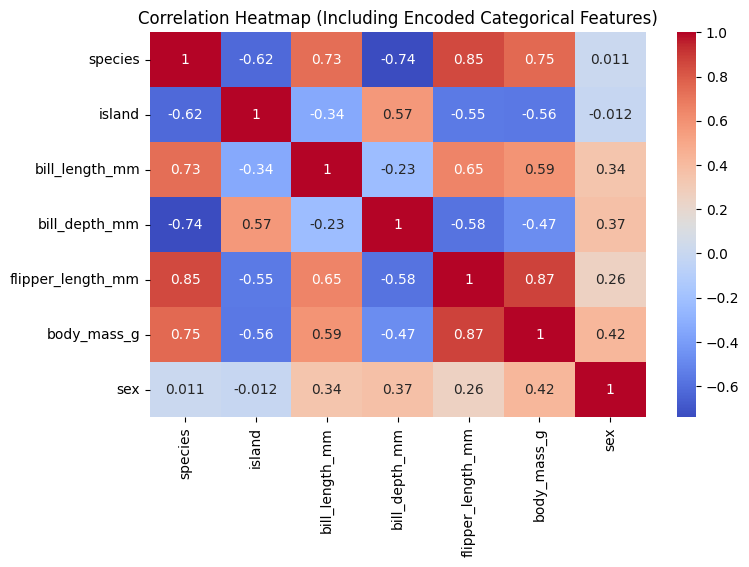

In [ ]:
# Cell 4 - Correlation AFTER encoding
plt.figure(figsize=(8,5))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Including Encoded Categorical Features)")
plt.show()



==== Decision Tree (max_depth=2) ====
Classification Report:
               precision    recall  f1-score   support

      Adelie       0.97      0.97      0.97        29
   Chinstrap       0.81      0.93      0.87        14
      Gentoo       1.00      0.92      0.96        24

    accuracy                           0.94        67
   macro avg       0.93      0.94      0.93        67
weighted avg       0.95      0.94      0.94        67



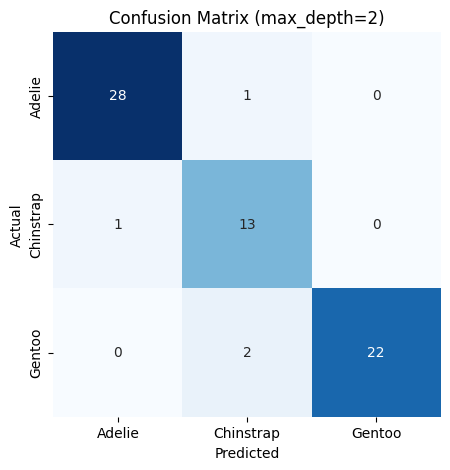


==== Decision Tree (max_depth=3) ====
Classification Report:
               precision    recall  f1-score   support

      Adelie       0.97      0.97      0.97        29
   Chinstrap       0.81      0.93      0.87        14
      Gentoo       1.00      0.92      0.96        24

    accuracy                           0.94        67
   macro avg       0.93      0.94      0.93        67
weighted avg       0.95      0.94      0.94        67



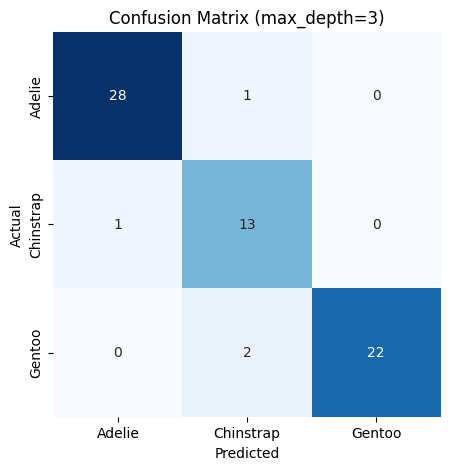


==== Decision Tree (max_depth=4) ====
Classification Report:
               precision    recall  f1-score   support

      Adelie       0.96      0.93      0.95        29
   Chinstrap       0.82      1.00      0.90        14
      Gentoo       1.00      0.92      0.96        24

    accuracy                           0.94        67
   macro avg       0.93      0.95      0.94        67
weighted avg       0.95      0.94      0.94        67



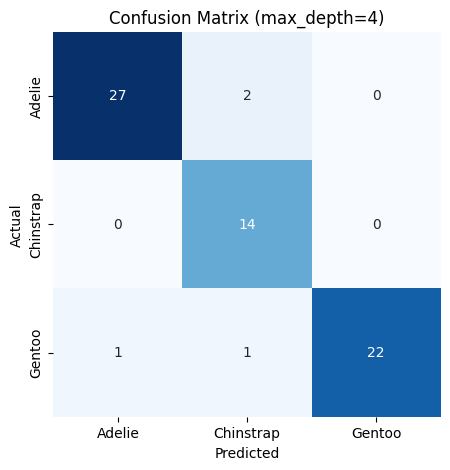


==== Decision Tree (max_depth=5) ====
Classification Report:
               precision    recall  f1-score   support

      Adelie       0.97      0.97      0.97        29
   Chinstrap       0.88      1.00      0.93        14
      Gentoo       1.00      0.92      0.96        24

    accuracy                           0.96        67
   macro avg       0.95      0.96      0.95        67
weighted avg       0.96      0.96      0.96        67



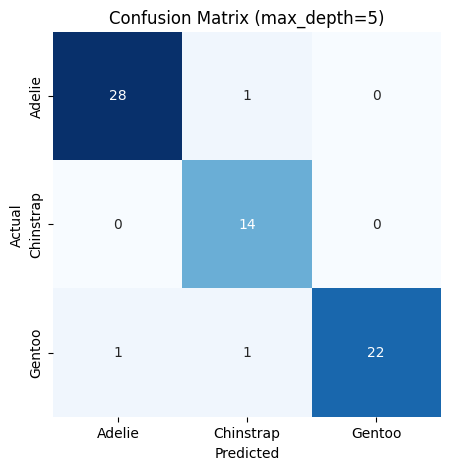

In [ ]:
# Cell 5 - Train & Evaluate with Different Depths
depths = [2, 3, 4, 5]
results = {}

for d in depths:
    dtree = DecisionTreeClassifier(max_depth=d, random_state=42)
    dtree.fit(X_train, y_train)
    y_pred = dtree.predict(X_test)

    print(f"\n==== Decision Tree (max_depth={d}) ====")
    print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoders["species"].classes_))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=label_encoders["species"].classes_,
                yticklabels=label_encoders["species"].classes_)
    plt.title(f"Confusion Matrix (max_depth={d})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    results[d] = dtree.score(X_test, y_test)


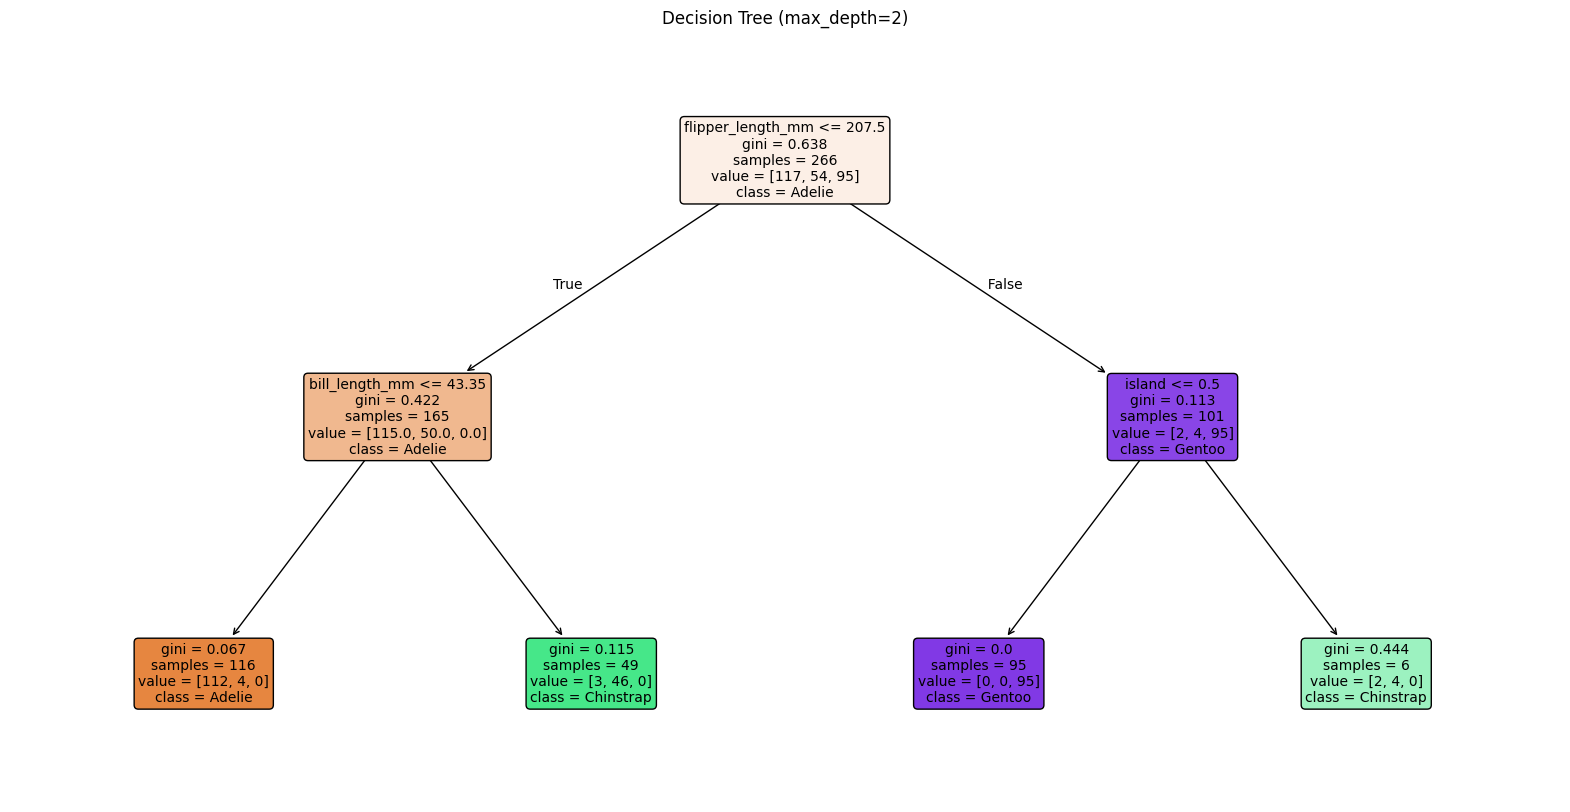

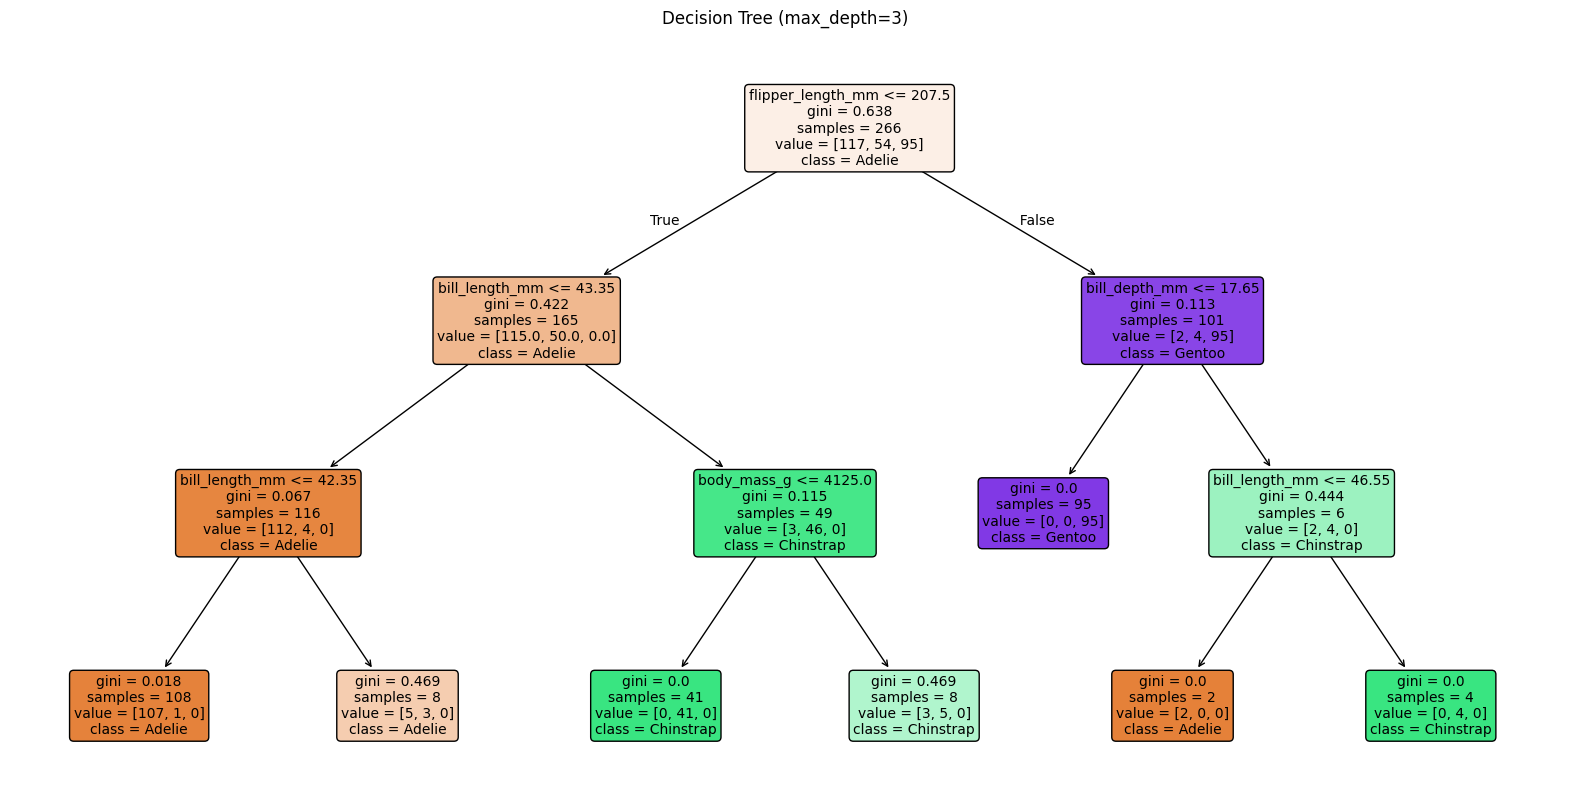

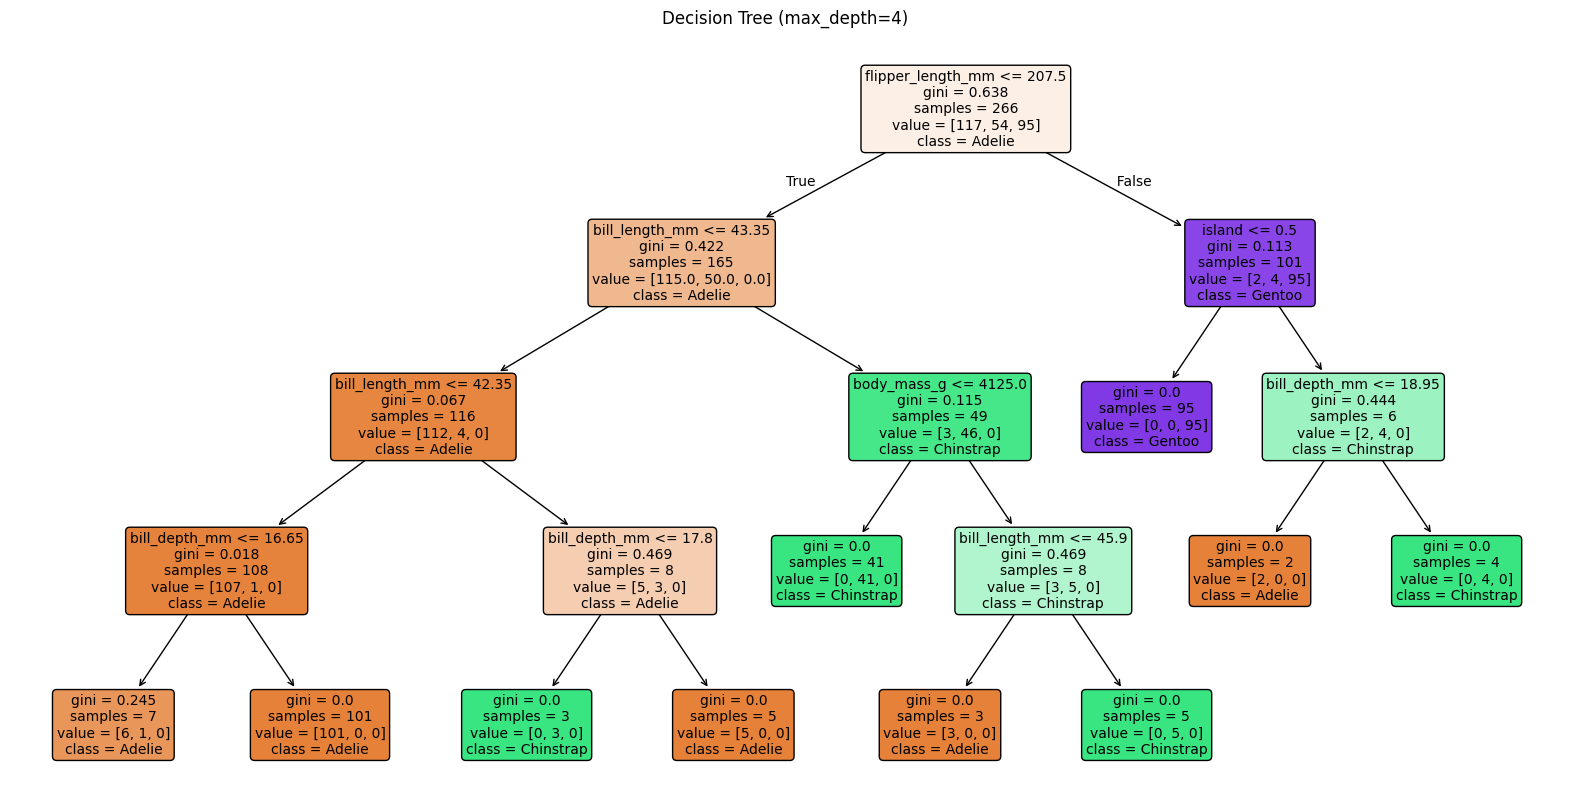

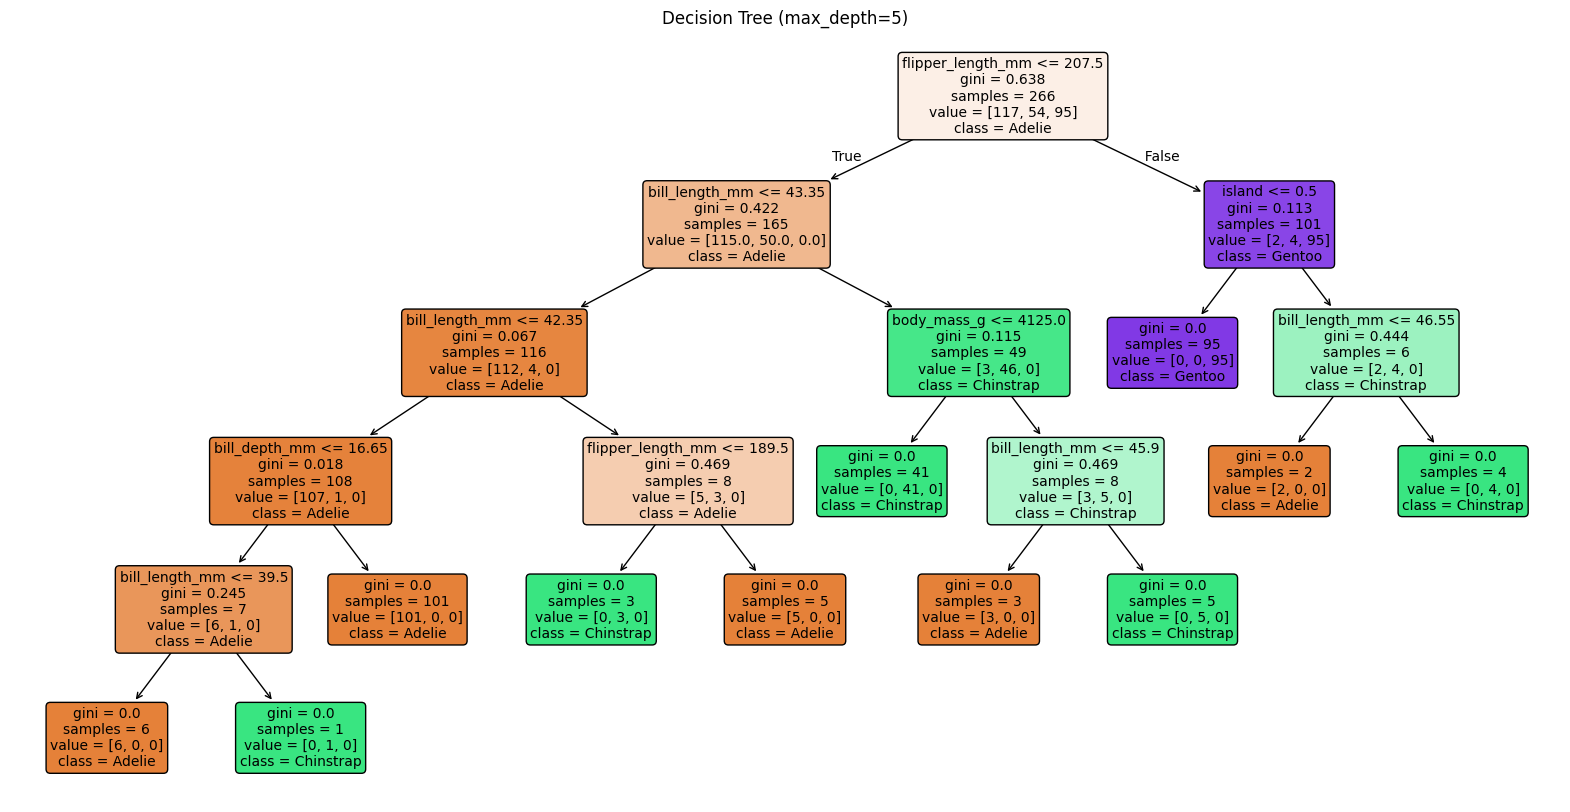

In [ ]:
# Cell 6 - Tree Visualizations
for d in [2, 3, 4, 5]:
    dtree = DecisionTreeClassifier(max_depth=d, random_state=42)
    dtree.fit(X_train, y_train)

    plt.figure(figsize=(20,10))
    plot_tree(
        dtree,
        feature_names=X.columns,
        class_names=label_encoders["species"].classes_,
        filled=True,
        rounded=True,
        fontsize=10
    )
    plt.title(f"Decision Tree (max_depth={d})")
    plt.show()


In [ ]:
# Cell 7 - Justification of Depths
for d, acc in results.items():
    if d == 2:
        print(f"Depth {d}: Very simple tree → underfitting likely. Accuracy = {acc:.2f}")
    elif d == 3:
        print(f"Depth {d}: Balanced complexity → good bias-variance tradeoff. Accuracy = {acc:.2f}")
    elif d == 4:
        print(f"Depth {d}: Captures more detail → slightly better fit, mild overfitting risk. Accuracy = {acc:.2f}")
    elif d == 5:
        print(f"Depth {d}: High complexity → may overfit training data. Accuracy = {acc:.2f}")


Depth 2: Very simple tree → underfitting likely. Accuracy = 0.94
Depth 3: Balanced complexity → good bias-variance tradeoff. Accuracy = 0.94
Depth 4: Captures more detail → slightly better fit, mild overfitting risk. Accuracy = 0.94
Depth 5: High complexity → may overfit training data. Accuracy = 0.96


Best depth based on accuracy = 5 with score 0.96


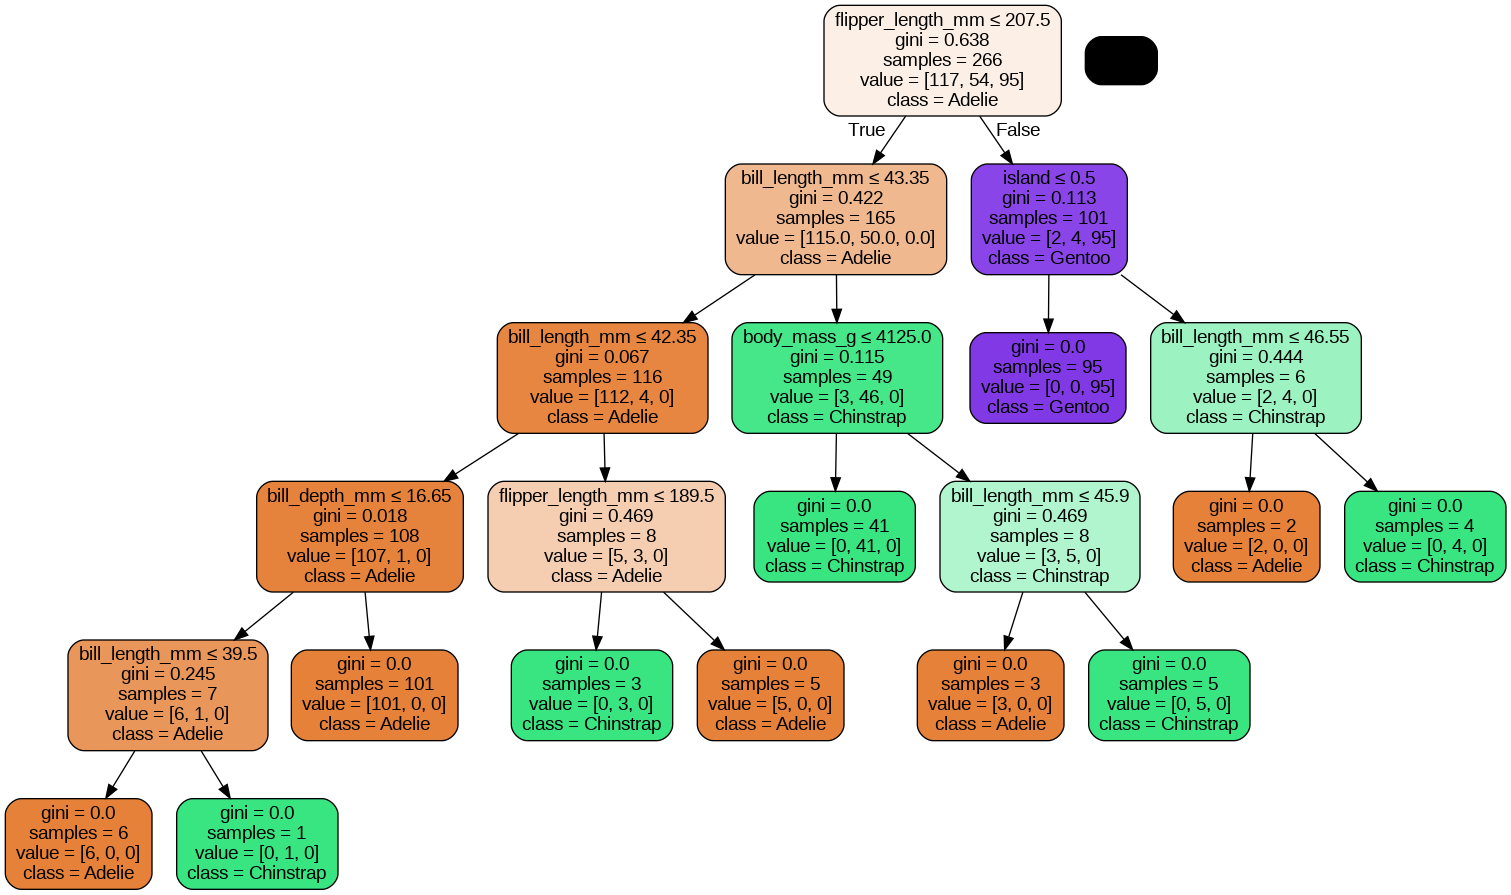

In [ ]:
# Cell 8 - Save Best Performing Decision Tree as PNG
best_depth = max(results, key=results.get)
print(f"Best depth based on accuracy = {best_depth} with score {results[best_depth]:.2f}")

best_tree = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
best_tree.fit(X_train, y_train)

# Export to DOT format
dot_data = export_graphviz(
    best_tree,
    out_file=None,
    feature_names=X.columns,
    class_names=label_encoders["species"].classes_,
    filled=True,
    rounded=True,
    special_characters=True
)

graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("best_penguin_tree.png")

# Display in notebook
Image(filename="best_penguin_tree.png")


In [ ]:
# Cell 9 - Download PNG file
files.download("best_penguin_tree.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>